# **Tech Store Sales Analysis**

**Importing Necessary Libraries**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


In [3]:
files_list = list(os.listdir('/content/'))
csv_files = [f for f in files_list if f.endswith('.csv')]

print("Uploaded CSV Files:", csv_files)

Uploaded CSV Files: ['Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_July_2019.csv', 'Sales_September_2019.csv', 'Sales_April_2019.csv', 'Sales_January_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_November_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv', 'Sales_October_2019.csv']


In [4]:
# Read and merge all CSV files
df_list = [pd.read_csv(f) for f in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

In [5]:
# Save merged file
merged_df.to_csv("merged_sales_data.csv", index=False)

In [6]:
all_data = pd.read_csv("merged_sales_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",3


In [7]:
# Save the final dataset
merged_df.to_csv("merged_sales_data.csv", index=False)

print("Merged file saved with Month column as merged_sales_data.csv")

Merged file saved with Month column as merged_sales_data.csv


In [8]:
all_data = pd.read_csv("merged_sales_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",3


**Cleaning up the data**


In [9]:
# Finding and dropping rows with NaN

nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [10]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",3


In [11]:
# Checking if the NaN were succesffully dropped

nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [12]:
# Removing text in order date column

all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [13]:
# Converting columns to the correct type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",3


In [14]:
# Adding city column

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.00,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX)
2,162009,Wired Headphones,2,11.99,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",3,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",3,San Francisco (CA)


# **Data Exploration!**

**What was the best month for sales? How much was earned that month?**

In [15]:
# Adding sales column

all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,162009,iPhone,1,700.00,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX),700.00
1,162009,Lightning Charging Cable,1,14.95,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX),14.95
2,162009,Wired Headphones,2,11.99,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX),23.98
3,162010,Bose SoundSport Headphones,1,99.99,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",3,San Francisco (CA),99.99
4,162011,34in Ultrawide Monitor,1,379.99,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",3,San Francisco (CA),379.99


In [16]:
all_data.groupby(['Month']).sum()

Output hidden; open in https://colab.research.google.com to view.

range(1, 13)


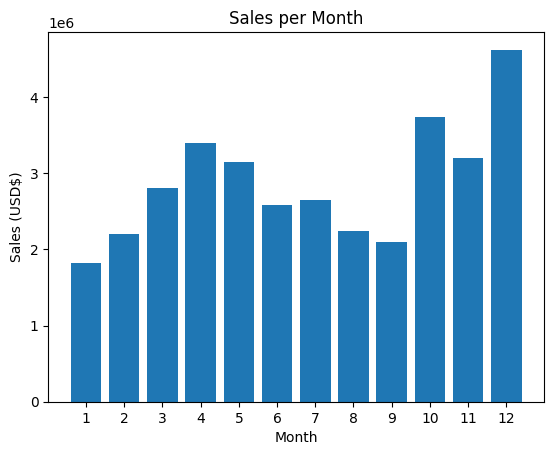

In [17]:
# Visualizing the data for Sales per Month

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.title('Sales per Month')
plt.ylabel('Sales (USD$)')
plt.xlabel('Month')
plt.show()

The best month for sales was December where they made a total of $4,613,443.34.


# What city sold the most product?


In [18]:
all_data.groupby(['City']).sum()

Output hidden; open in https://colab.research.google.com to view.

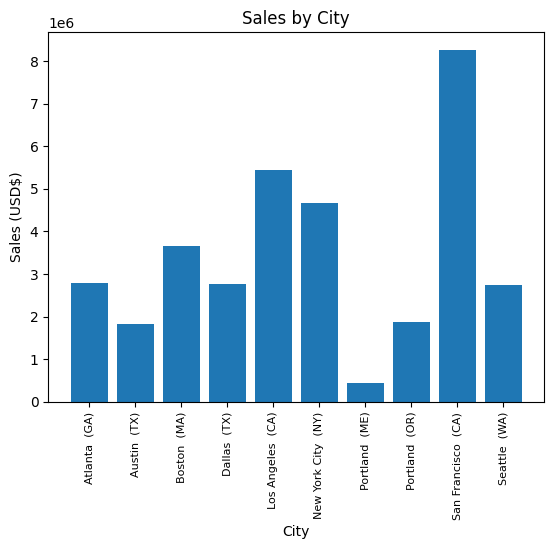

In [22]:
# Visualizing the data for Sales per city

city_sales = all_data.groupby('City').sum(numeric_only=True)['Sales']
keys = city_sales.index.tolist()

plt.bar(keys, city_sales.values)
plt.title('Sales by City')
plt.ylabel('Sales (USD$)')
plt.xlabel('City')
plt.xticks(rotation='vertical', size=8)
plt.show()

The city that sold the most products was San Francisco (CA).


# What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
# Adding time columns

all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,162009,iPhone,1,700.00,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX),700.00,20,59,1
1,162009,Lightning Charging Cable,1,14.95,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX),14.95,20,59,1
2,162009,Wired Headphones,2,11.99,3/28/2019 20:59,"942 Church St, Austin, TX 73301",3,Austin (TX),23.98,20,59,1
3,162010,Bose SoundSport Headphones,1,99.99,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",3,San Francisco (CA),99.99,5,39,1
4,162011,34in Ultrawide Monitor,1,379.99,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",3,San Francisco (CA),379.99,0,1,1


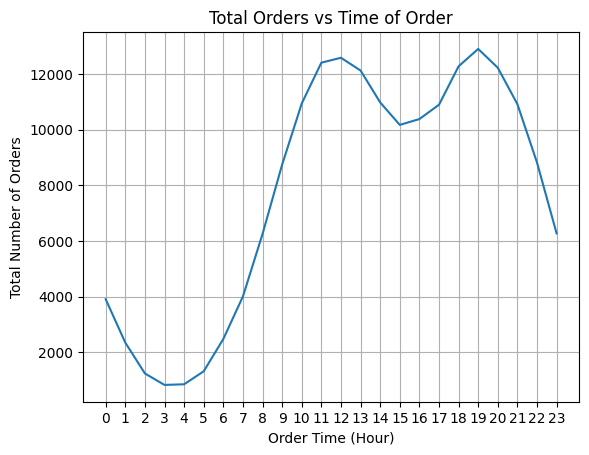

In [25]:
# Using the order time from customers' orders to plot a graph

keys = all_data['Hour'].sort_values().unique()

plt.plot(keys, all_data.groupby('Hour').count()['Count'])
plt.xticks(keys)
plt.title('Total Orders vs Time of Order')
plt.ylabel('Total Number of Orders')
plt.xlabel('Order Time (Hour)')
plt.grid()
plt.show()

The best time for ads to be aired would be 11AM-12PM or around 7PM.


# What product sold the most? Why do you think it sold the most?


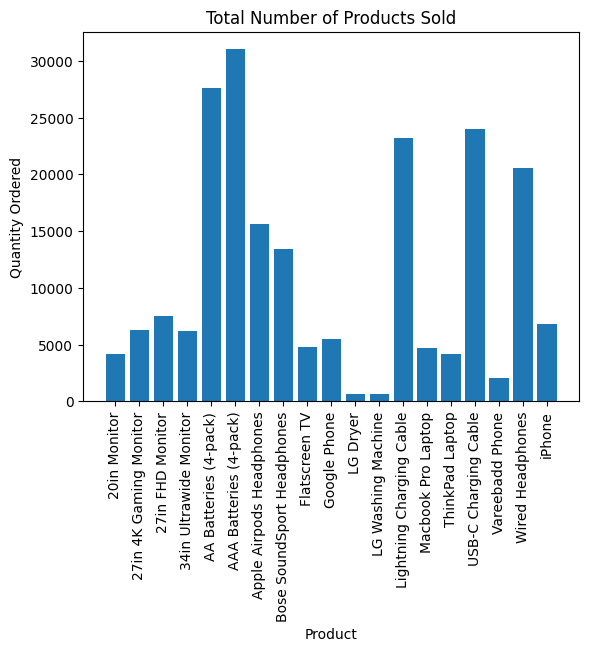

In [26]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.title('Total Number of Products Sold')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

The product sold the most were AAA Batteries. This may be due to a lot of electronics using them as a power source and its cost in comparison to the other items.


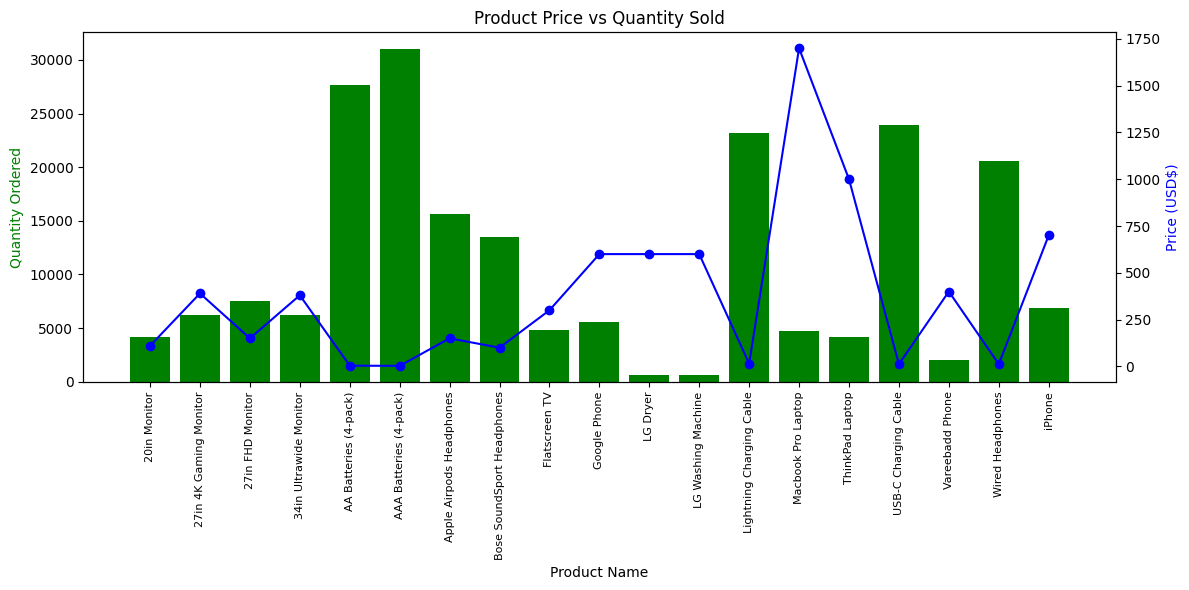

In [29]:
# Calculate total quantity and average price for each product
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']
prices = product_group.mean(numeric_only=True)['Price Each']
keys = quantity_ordered.index  # list of product names

# Create the plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b', marker='o')

# Set labels
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price (USD$)', color='b')

# Rotate x-axis labels
ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.title('Product Price vs Quantity Sold')
plt.tight_layout()
plt.show()